In [4]:
using Plots
using HDF5

In [6]:
include("simpleNN.jl")

pic_model (generic function with 5 methods)

In [7]:
x = rand(1000,100)
w, b = initWB(x)
y = rand(1, 100)
wn, bn, costs = multiBackprop(x, y, w, b, 0.0001, σ, 2000)
ŷ = predict(wn, bn, x, σ)
crossentropy(ŷ, y)

DimensionMismatch: DimensionMismatch("mismatch in dimension 1 (expected 0 got 1)")

In [8]:
gr()

Plots.GRBackend()

In [9]:
plot(1:length(costs), costs)
# scatter!(1:length(costs), costs)

UndefVarError: UndefVarError: costs not defined


# Test on Cats Pics

Test the previous model on hdf5 data of cat pics to do classification

In [42]:
h5open("train_catvnoncat.h5", "r") do train_file
    global train_set_x_org = read(train_file, "train_set_x")
    global train_set_y     = read(train_file, "train_set_y")
    train_set_y = reshape(train_set_y, 1, length(train_set_y))
end
h5open("test_catvnoncat.h5", "r") do test_file
    global test_set_x_org = read(test_file, "test_set_x")
    global test_set_y     = read(test_file, "test_set_y")
    test_set_y = reshape(test_set_y, 1, length(test_set_y))
    global classes = read(test_file, "list_classes")
end
;
rgp, npxls, npxls, npics_train = size(train_set_x_org)
rgp, npxls, npxls, npics_test = size(test_set_x_org)

(3, 64, 64, 50)

In [43]:
X_train = reshape(train_set_x_org, (rgp*npxls*npxls, npics_train))
X_train = X_train ./ 255
X_test = reshape(test_set_x_org, (rgp*npxls*npxls, npics_test))
X_test = X_test ./ 255
Y_train = train_set_y
Y_test = test_set_y
w, b = initWB(X_train)
Ŷ_train = predict(X_train, w, b, σ)
Ŷ_test = zeros((1, npics_test))
crossentropy(Ŷ_train, Y_train)

0.6931471805599454

In [44]:
d = pic_model(X_train, Y_train, X_test, Y_test, σ, 2000, 0.005)

DimensionMismatch: DimensionMismatch("mismatch in dimension 1 (expected 0 got 1)")

In [21]:
# npics_train = size(train_set_x_org)[end]
# npics_test = size(test_set_x_org)[end]
# pxls_train = size(train_set_x_org)[2]
w, b = initWB(X_train)
w, b, train_costs = multiBackprop(X_train, Y_train, w, b, 0.005, σ, 2000)
Ŷ_train = broadcast((x)-> x>0.5 ? 1 : 0, predict(X_train, w, b, σ))
# x = reshape(test_set_x_org, (3*pxls_train^2,npics_test))
# ŷ_test = broadcast((x)-> x>0.5 ? 1 : 0, predict(x, W, B, σ))

# ŷ = σ.(W'x .+ B)
# ŷ.==0
# size(x)
# costs

InterruptException: InterruptException:

In [77]:
println("Accuracy of train set = $(sum(abs.(train_set_y .* ŷ_train))/length(train_set_y))")

Accuracy of train set = 0.3444976076555024


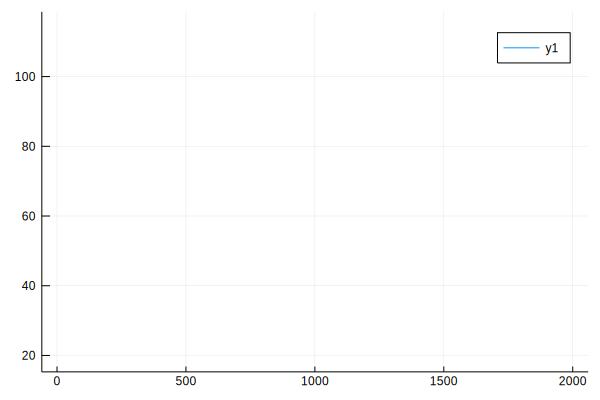

In [79]:
plot(1:length(train_costs), train_costs)


In [11]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` at the end of `collection`.

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

Use [`append!`](@ref) to add all the elements of another collection to `collection`. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`.

---

```
push!(q::Deque{T}, x)
```

Add an element to the back

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb::CircularBuffer, data)
```

Add an element to the back and overwrite front if full.
